# Data Load

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir("C:\\Users\\ManosIeronymakisProb\\OneDrive - Probability\\Bureaublad\\thesis temporary\\Slow ESG data")

filepath1 =  "S&P500_Slow_Environmental_Score.csv"
filepath2 = "S&P500_Slow_ESG_Scores.xlsx"
filepath3= "S&P500_Slow_Governance_Score.csv"
filepath4= "S&P500_Slow_Social_Score.csv"

EP = pd.read_csv(filepath1)
ESG = pd.read_excel(filepath2)
GP= pd.read_csv(filepath3)
SP= pd.read_csv(filepath4)

# E,S and G pillar statistical table

In [4]:
# Select the date columns from 2024 to 2005
date_columns = ['31/12/2005',
       '31/12/2006', '31/12/2007', '31/12/2008', '31/12/2009', '31/12/2010',
       '31/12/2011', '31/12/2012', '31/12/2013', '31/12/2014', '31/12/2015',
       '31/12/2016', '31/12/2017', '31/12/2018', '31/12/2019', '31/12/2020',
       '31/12/2021', '31/12/2022']


dataframes = {"EP": EP, "ESG": ESG, "GP": GP, "SP": SP}

In [5]:
#statistical table for E,S and G Pillar for Slow ESG scores 

# Function to generate summary for a given dataframe and date columns
def generate_summary(df, name):
    existing_date_columns = [col for col in date_columns if col in df.columns]
    
    if not existing_date_columns:
        return pd.DataFrame()  # Return an empty DataFrame if no date columns are found

    combined_dates = pd.concat([df[col] for col in existing_date_columns])

    # Generate statistical summary for combined dates
    statistical_summary_combined = combined_dates.describe()

    # Count missing values for combined dates
    missing_values_count_combined = combined_dates.isnull().sum()

    # Get total observations for combined dates
    total_observations_combined = len(combined_dates)

    # Calculate median for combined dates
    median_value_combined = combined_dates.median()

    # Calculate percentage of missing values for combined dates
    percentage_missing_values_combined = (missing_values_count_combined / total_observations_combined) * 100

    # Create a DataFrame to hold the summary
    summary_combined = pd.DataFrame(statistical_summary_combined)
    summary_combined.loc['missing_values_count'] = missing_values_count_combined
    summary_combined.loc['total_observations'] = total_observations_combined
    summary_combined.loc['median'] = median_value_combined
    summary_combined.loc['percentage_missing_values'] = percentage_missing_values_combined

    summary_combined['dataframe'] = name  # Add the dataframe name for reference
    return summary_combined

# Generate summaries for all dataframes and concatenate them
summaries = []
for name, df in dataframes.items():
    summary = generate_summary(df, name)
    if not summary.empty:
        summaries.append(summary)

# Combine all summaries into a single DataFrame
if summaries:
    combined_summary = pd.concat(summaries)
    print(combined_summary)
else:
    print("No valid summaries to display")

print(combined_summary)

                                     0 dataframe
count                      7751.000000        EP
mean                         46.466044        EP
std                          28.806217        EP
min                           0.000000        EP
25%                          21.895425        EP
50%                          50.586510        EP
75%                          71.146172        EP
max                          98.545806        EP
missing_values_count       1231.000000        EP
total_observations         8982.000000        EP
median                       50.586510        EP
percentage_missing_values    13.705188        EP
count                      7751.000000        GP
mean                         57.209960        GP
std                          21.415642        GP
min                           0.618169        GP
25%                          41.874172        GP
50%                          59.537612        GP
75%                          74.061716        GP
max                 

# Missing Values analysis and plot

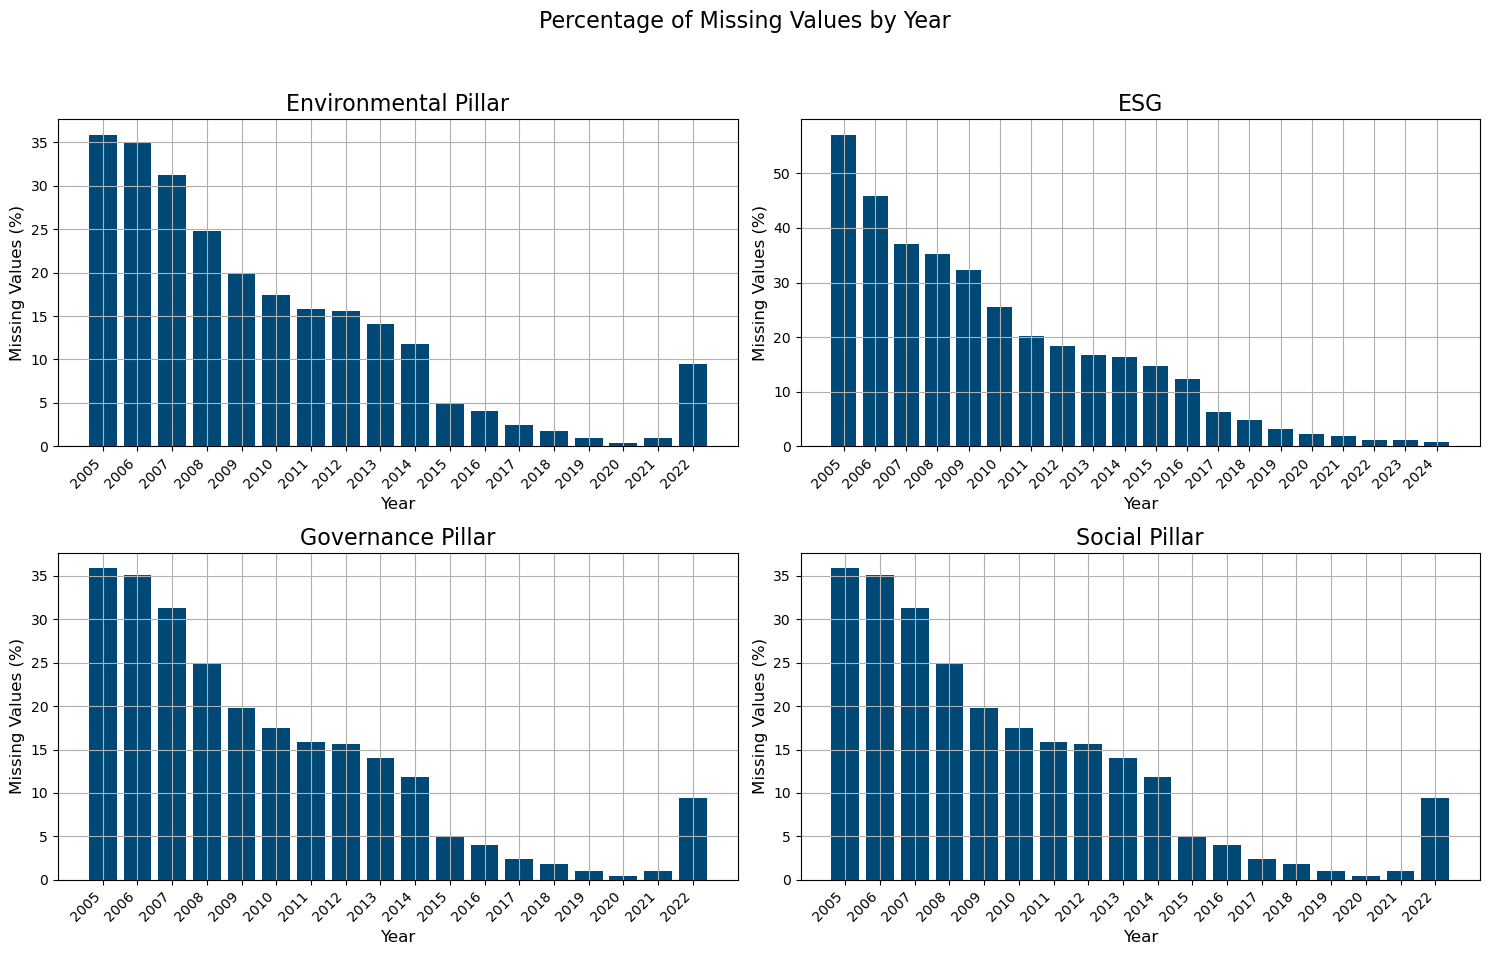

In [6]:
titles = {"EP": "Environmental Pillar", "ESG": "ESG", "GP": "Governance Pillar", "SP": "Social Pillar"}

# Reverse the columns for ESG dataframe (only 2024-2005)
esg_columns = [year for year in range(2024, 2004, -1)]
existing_esg_columns = [col for col in ESG.columns if col in esg_columns]
ESG = ESG[existing_esg_columns]

# Function to calculate the percentage of missing values for each date column
def calculate_missing_values_percentage(df, columns):
    percentages = [df[col].isnull().mean() * 100 if col in df.columns else 0 for col in columns]
    return percentages

# Calculate missing values percentages for all dataframes
missing_values_percentages = {}
for name, df in dataframes.items():
    if name == "ESG":
        years = [str(year) for year in range(2005, 2025)]
        percentages = calculate_missing_values_percentage(df, existing_esg_columns)
        percentages.reverse()  # reverse percentages to match the years order
    else:
        years = [col[-4:] for col in date_columns]
        percentages = calculate_missing_values_percentage(df, date_columns)
    
    missing_values_percentages[name] = (years, percentages)

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Percentage of Missing Values by Year', fontsize=16)

bar_color = '#004976'
title_fontsize = 16

for ax, (name, (years, percentages)) in zip(axs.ravel(), missing_values_percentages.items()):
    if name != "ESG":
        # Filter out 2023 and 2024 for the pillars
        years = years[:len(date_columns)]
        percentages = percentages[:len(date_columns)]
        
    ax.bar(years, percentages, color=bar_color)
    ax.set_title(titles[name], fontsize=title_fontsize)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Missing Values (%)', fontsize=12)
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years, rotation=45, ha='right')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ESG Statistical table 

In [7]:
# statistic table of slow ESG scores
# Define the year columns as integers
year_columns = list(range(2005, 2025))

# Function to generate summary for a given dataframe and date columns
def generate_summary(df, columns):
    existing_date_columns = [col for col in columns if col in df.columns]
    
    if not existing_date_columns:
        return pd.DataFrame()  # Return an empty DataFrame if no date columns are found

    combined_dates = pd.concat([df[col] for col in existing_date_columns])

    # Generate statistical summary for combined dates
    statistical_summary_combined = combined_dates.describe()

    # Count missing values for combined dates
    missing_values_count_combined = combined_dates.isnull().sum()

    # Get total observations for combined dates
    total_observations_combined = len(combined_dates)

    # Calculate median for combined dates
    median_value_combined = combined_dates.median()

    # Calculate percentage of missing values for combined dates
    percentage_missing_values_combined = (missing_values_count_combined / total_observations_combined) * 100

    # Create a DataFrame to hold the summary
    summary_combined = pd.DataFrame(statistical_summary_combined)
    summary_combined.loc['missing_values_count'] = missing_values_count_combined
    summary_combined.loc['total_observations'] = total_observations_combined
    summary_combined.loc['median'] = median_value_combined
    summary_combined.loc['percentage_missing_values'] = percentage_missing_values_combined

    return summary_combined

# Generate summary for ESG dataframe
esg_summary = generate_summary(ESG, year_columns)

# Print the ESG summary
print(esg_summary)

                                      0
count                       8285.000000
mean                          52.603614
std                           20.157407
min                            0.598597
25%                           36.801998
50%                           54.234325
75%                           69.130022
max                           95.162371
missing_values_count        1775.000000
total_observations         10060.000000
median                        54.234325
percentage_missing_values     17.644135
